# Classification: separation of the LMC and MW populations in Gaia data

The goal of this exercise is to reproduce the classification results of the paper"Kinemati analysis of the Large Magellanic Cloud using Gaia DR3

https://www.aanda.org/articles/aa/pdf/2023/01/aa44601-22.pdf

In this paper the Gaia DR3 data is used to identify stars belonging to the Large Magellanic Cloud(LMc) using a classifier that distinguishes them from the foreground stellar population of the Milky Way (MW).

You can download the data files from this link.

https://drive.google.com/file/d/1N34N82FdhdtmW5Y3n4-xwPjvhVxeR0Dz/view?usp=sharing

There are four data files, described in the paper.

**LMC+Mw_GOG_trainingset_frac=0.2.csv** A training data set where the LMC and MW objects are flagged, to be used to train the classifier.

**xm_cepheids_LMc-result.csv** A validation dataset of LMC Cepheids, to check the results of the classifier.

**xm_rrlyrae_LMC-result.csv** A validation dataset of LMC RR-Lyrae, to check the results of the classifier.

**LMc_base_sample.pkl** The problem sample from Gaia DR3 to apply the trained classifier. Warning: big file, 1.5GB. Note: this "base sample" is quite big, you do not have to use it in full, you can extract a subsample that is more manageable for your computer.

In the virtual campus you will also find two python template notebooks that will help you in reading the first and fourth files.

In this exercise you have to:

1. Select and train some classifiers of your choice, aiming to reproduce the results of the paper (do not limit yourself to the choice of classifiers in the paper)
2. Evaluate the performance of your selected algorithms in terms of completeness with the provided validation files
3. Select your best algorithm and apply it to the base sample. Discuss the results (distribution of probabilities of the stars, distribution of proper motions/parallaxes/colors of the resulting classified samples, etc.).

## We read the training file

In [3]:
# We import the libraries we will need

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time
import pickle

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

Now we open and read the training data set:

In [6]:
LMC_Rs = pd.read_csv('data/data/LMC+MW_GOG_trainingset_frac=0.2.csv')
LMC_Rs = LMC_Rs.sample(frac=1).reset_index(drop=True) # We shuffle the dataset so there is no specific order

# We remove the column with the galaxy label (LMC/MW)
Type = LMC_Rs['Type'].to_numpy()
Train_LMC_Rs = LMC_Rs.drop('Type', axis=1).to_numpy()
np.shape(Train_LMC_Rs)

X = Train_LMC_Rs
y = Type

test_size = 0.4

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=test_size, random_state=2)

# Standardize the features
#scaler = StandardScaler()
#trainX = scaler.fit_transform(trainX)
#testX = scaler.transform(testX)

In [7]:
## Filter the data to only include rows where the last column (type) is 1
#filtered_data = LMC_Rs[LMC_Rs.iloc[:, -1] == 1]
#
## Plot columns 'ra' (column 0) vs. 'dec' (column 1)
#plt.figure(figsize=(10, 6))
#plt.scatter(filtered_data['ra'], filtered_data['dec'], s=1, alpha=0.7, label='Type 1 Objects')
#plt.xlabel('RA (Right Ascension)')
#plt.ylabel('DEC (Declination)')
#plt.title('RA vs DEC for Type 1 Objects')
#plt.legend()
#plt.grid(True)
#plt.show()

# Indeed calss 1 objects are from the LMC.

The variables defined here are:

trainX - array with the information about the stars we will use for training \
testX - array with the real type of the stars we will use for training \
trainy - array with the information about the stars we will use for testing \
testy - array with the real type of the stars we will use for testing

## We train the models

Here we will consider four different models, and at the end we will select the best one. Also, for the case of the neural network models, we will consider different configurations of the neural network and select the best one.

In [12]:
# Train different NN with different configurations:

# 1

mlp = MLPClassifier(hidden_layer_sizes=(6, 3, 2), 
                     activation='relu', 
                     solver='adam',   # For the moment we'll try with adam, but in the paper they use sgd, which allows for more fine tunning.
                     max_iter=1000,
                     alpha=1e-5,  # Regularization strength (L2 regularization)
                     random_state=42)

# Check how much time it takes to train the NN:
start = time.time()  # Record the start time
mlp.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time NN: {end - start} seconds")

# 2

# Create and train the MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(6, 4, 2), 
                     activation='relu', 
                     solver='adam',   # For the moment we'll try with adam, but in the paper they use sgd, which allows for more fine tunning.
                     max_iter=1000,
                     alpha=1e-5,  # Regularization strength (L2 regularization)
                     random_state=42)

# Check how much time it takes to train the NN:
start = time.time()  # Record the start time
mlp1.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time NN1: {end - start} seconds")

# 3

# Create and train the MLPClassifier
mlp2 = MLPClassifier(hidden_layer_sizes=(6, 4, 3, 2), 
                     activation='relu', 
                     solver='adam',   # For the moment we'll try with adam, but in the paper they use sgd, which allows for more fine tunning.
                     max_iter=1000,
                     alpha=1e-5,  # Regularization strength (L2 regularization)
                     random_state=42)

# Check how much time it takes to train the NN:
start = time.time()  # Record the start time
mlp2.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time NN2: {end - start} seconds")


# 4

# Create and train the MLPClassifier
mlp3 = MLPClassifier(hidden_layer_sizes=(8, 4, 2), 
                     activation='relu', 
                     solver='adam',   # For the moment we'll try with adam, but in the paper they use sgd, which allows for more fine tunning.
                     max_iter=1000,
                     alpha=1e-5,  # Regularization strength (L2 regularization)
                     random_state=42)

# Check how much time it takes to train the NN:
start = time.time()  # Record the start time
mlp3.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time NN3: {end - start} seconds")

# We consider also other classifiers

# Random Forest
model_RF = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# K- Nearest Neighbors
model_KNN = KNeighborsClassifier(n_neighbors=5)

# Gradient Boosting
model_GB = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train classifiers
start = time.time()  # Record the start time
model_RF.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time RF: {end - start} seconds")

start = time.time()  # Record the start time
model_KNN.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time KNN: {end - start} seconds")

start = time.time()  # Record the start time
model_GB.fit(trainX, trainy)
end = time.time()  # Record the end time
print(f"Execution time GB: {end - start} seconds")

Execution time NN: 109.03271651268005 seconds
Execution time NN1: 107.12104773521423 seconds
Execution time NN2: 92.76879787445068 seconds
Execution time NN3: 78.94712495803833 seconds
Execution time RF: 179.82831525802612 seconds
Execution time KNN: 4.454642295837402 seconds
Execution time GB: 188.69051027297974 seconds


Now we compute their ROC curves, and AUC (Area Under the Curve) to see which one works better. Remember, the higher the AUC the better the classifier is.

In [14]:
# Check the models trained:

# COMPUTE THEIR ROC CURVES

# Predict probabilities for the LMC class

y_prob = mlp.predict_proba(testX)[:, 1]
y_prob1 = mlp1.predict_proba(testX)[:, 1]
y_prob2 = mlp2.predict_proba(testX)[:, 1]
y_prob3 = mlp3.predict_proba(testX)[:, 1]
y_prob_RF = model_RF.predict_proba(testX)[:, 1]
y_prob_KNN = model_KNN.predict_proba(testX)[:, 1]
y_prob_GB = model_GB.predict_proba(testX)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(testy, y_prob)
fpr1, tpr1, thresholds1 = roc_curve(testy, y_prob1)
fpr2, tpr2, thresholds2 = roc_curve(testy, y_prob2)
fpr3, tpr3, thresholds3 = roc_curve(testy, y_prob3)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(testy, y_prob_RF)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(testy, y_prob_KNN)
fpr_GB, tpr_GB, thresholds_GB = roc_curve(testy, y_prob_GB)

# Compute AUC (Area Under the Curve)
auc = roc_auc_score(testy, y_prob)
auc1 = roc_auc_score(testy, y_prob1)
auc2 = roc_auc_score(testy, y_prob2)
auc3 = roc_auc_score(testy, y_prob3)
auc_RF = roc_auc_score(testy, y_prob_RF)
auc_KNN = roc_auc_score(testy, y_prob_KNN)
auc_GB = roc_auc_score(testy, y_prob_GB)

# We check the AUC values

print("AUC NN:", auc)
print("AUC NN1:", auc1)
print("AUC NN2:", auc2)
print("AUC NN3:", auc3)
print("AUC RF:", auc_RF)
print("AUC KNN:", auc_KNN)
print("AUC GB:", auc_GB)

AUC NN: 0.9996009088161283
AUC NN1: 0.9995341520324228
AUC NN2: 0.9994074159252883
AUC NN3: 0.9994017631914041
AUC RF: 0.9998966085777742
AUC KNN: 0.9990745774621349
AUC GB: 0.9998291175685441


We plot the ROC curve for the NN called **mp3** (is the best of all the different neural networks trained, and has very similar AUC to all the other classifiers, despite not being the best one), and we obtain the most optimal threshold. If we also plotted the ROC curves for all the other classifiers we would obtain similar results.

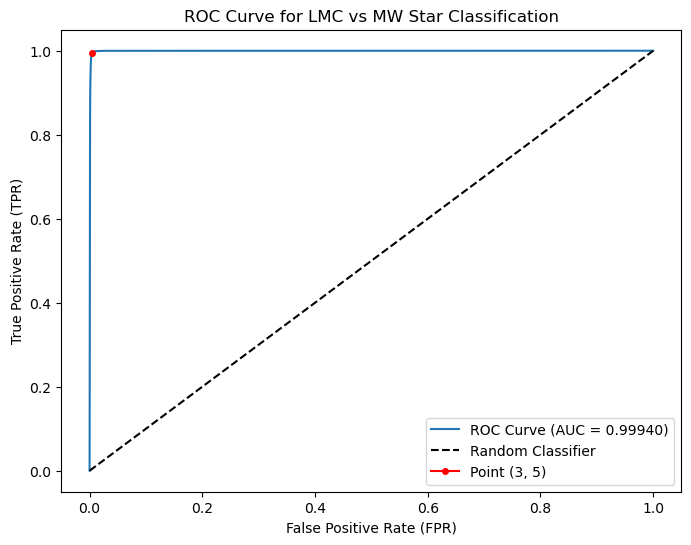

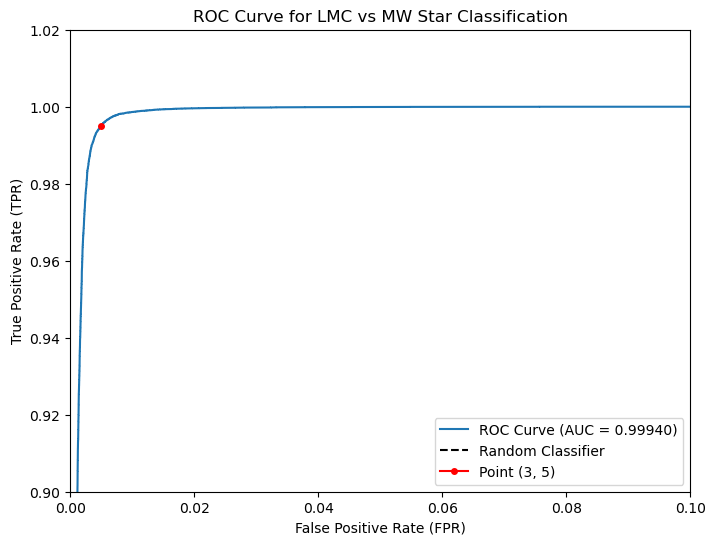

Optimal threshold: 0.5068397396234668


In [16]:
# mlp3
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label="ROC Curve (AUC = {:.5f})".format(auc3))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line for random guessing
plt.plot(fpr3[np.argmin(abs(tpr3-(1-fpr3)))], tpr3[np.argmin(abs(tpr3-(1-fpr3)))], marker='o', color='red', label='Point (3, 5)', markersize=4) # Plot the point with a marker
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for LMC vs MW Star Classification")
plt.legend(loc="lower right")
plt.show()

# Zoom of the mlp3
xmin = 0
xmax = 0.1
ymin = 0.9
ymax = 1.02
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label="ROC Curve (AUC = {:.5f})".format(auc3))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line for random guessing
plt.plot(fpr3[np.argmin(abs(tpr3-(1-fpr3)))], tpr3[np.argmin(abs(tpr3-(1-fpr3)))], marker='o', color='red', label='Point (3, 5)', markersize=4) # Plot the point with a marker
#plt.plot(fpr3[elbow_idx3], tpr3[elbow_idx3], marker='o', color='red', label='Point (3, 5)', markersize=1) # Plot the point with a marker
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for LMC vs MW Star Classification")
plt.legend(loc="lower right")
plt.axis([xmin, xmax, ymin, ymax])
plt.show()
print("Optimal threshold:",thresholds3[np.argmin(abs(tpr3-(1-fpr3)))])
optimal_threshold = thresholds3[np.argmin(abs(tpr3-(1-fpr3)))]


## Prediction + validation

Here we will test the trained classifiers with the two test files provided in the task, the one with cepheids and the one with RR_Lyrae stars. All this stars pertain to the LMC, so let's see how our classifiers do.

First of all, we read the files:

In [18]:
# cepheids file

cepheids_LMC_result = pd.read_csv('data/data/xm_cepheids_LMC-result.csv')

# We select the same columns as the ones used in the NN training
features = ["ra", "dec", "pmra", "pmra_error", "pmdec", "pmdec_error", "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag", "parallax", "parallax_error"]
cepheids_LMC_result_right_columns = cepheids_LMC_result[features]
cepheids_LMC_result_right_columns = cepheids_LMC_result_right_columns.dropna() # We drop the Nans
cepheids_LMC_result_right_columns_np = cepheids_LMC_result_right_columns.to_numpy()
print(np.shape(cepheids_LMC_result_right_columns_np))

# rrlyrae file

rrlyrae_LMC_result = pd.read_csv('data/data/xm_rrlyrae_LMC-result.csv')

# We select the same columns as the ones used in the NN training
features = ["ra", "dec", "pmra", "pmra_error", "pmdec", "pmdec_error", "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag", "parallax", "parallax_error"]
rrlyrae_LMC_result_right_columns = rrlyrae_LMC_result[features]
rrlyrae_LMC_result_right_columns = rrlyrae_LMC_result_right_columns.dropna() # We drop the Nans
rrlyrae_LMC_result_right_columns_np = rrlyrae_LMC_result_right_columns.to_numpy()
print(np.shape(rrlyrae_LMC_result_right_columns_np))


# Standardize the features
#scaler = StandardScaler()
#cepheids_LMC_result_right_columns_np = scaler.fit_transform(cepheids_LMC_result_right_columns_np)
#rrlyrae_LMC_result_right_columns_np = scaler.fit_transform(rrlyrae_LMC_result_right_columns_np)

(4467, 11)
(21327, 11)


Now we compute the predicted probabilities:

In [20]:
# test the classifier:

# Predict class probabilities
y_prob_cepheids_NN = mlp3.predict_proba(cepheids_LMC_result_right_columns_np)   # Probability for the positive class (e.g., LMC)
y_prob_rrlyrae_NN = mlp3.predict_proba(rrlyrae_LMC_result_right_columns_np) # Probability for the positive class (e.g., LMC)

y_prob_cepheids_RF = model_RF.predict_proba(cepheids_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)
y_prob_rrlyrae_RF = model_RF.predict_proba(rrlyrae_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)

y_prob_cepheids_KNN = model_KNN.predict_proba(cepheids_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)
y_prob_rrlyrae_KNN = model_KNN.predict_proba(rrlyrae_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)

y_prob_cepheids_GB = model_GB.predict_proba(cepheids_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)
y_prob_rrlyrae_GB = model_GB.predict_proba(rrlyrae_LMC_result_right_columns_np)  # Probability for the positive class (e.g., LMC)

We can plot the probability histogram of being in the LMC or the MW. (Here we just do it for the NN, but for the other classifiers we would obtain similar results).

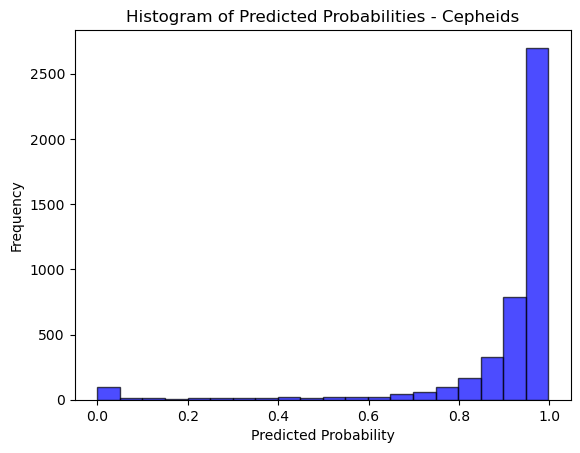

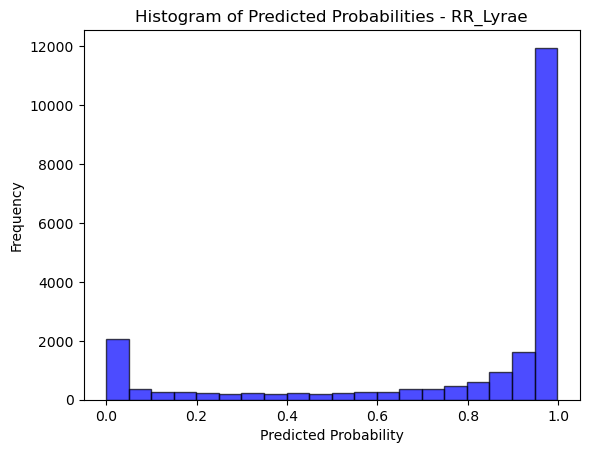

In [22]:
# Plot the histogram
plt.hist(y_prob_cepheids_NN[:,1], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities - Cepheids")
plt.show()

# Plot the histogram
plt.hist(y_prob_rrlyrae_NN[:,1], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities - RR_Lyrae")
plt.show()

The probability of belonging to the class 1 (LMC) for the Chepeids and the RR-Lyrae is represented in the histograms above. Since both all the Chepeids and RR-Lyrae belong to the LMC, the probability should be strictly 1. We see that most of the objects are classified as LMC objects, as we expected, nonetheless, there are also some objects wrongly classified as MW objects. Let's look into that in more detail by computing the confusion matrix.

In [24]:
# Logistic Regression

# Predict class

# Define a custom threshold
custom_threshold = optimal_threshold  # Example: Use 0.7 as the threshold

# Step 3: Apply the threshold to assign class labels
y_cepheids_NN = (y_prob_cepheids_NN[:,1] >= custom_threshold).astype(int)  # Class 1 if prob >= 0.7, else Class 0
y_rrlyrae_NN = (y_prob_rrlyrae_NN[:,1] >= custom_threshold).astype(int)   # Class 1 if prob >= 0.7, else Class 0


print(f" Results for Neural networks: ")
print(f" Chepeids :")
print(confusion_matrix(np.ones(len(y_prob_cepheids_NN[:,1])),y_cepheids_NN))
print(f"RR Lyrae :")
print(confusion_matrix(np.ones(len(y_prob_rrlyrae_NN[:,1])),y_rrlyrae_NN))



y_cepheids_RF = (y_prob_cepheids_RF[:,1] >= custom_threshold).astype(int)  # Class 1 if prob >= 0.7, else Class 0
y_rrlyrae_RF = (y_prob_rrlyrae_RF[:,1] >= custom_threshold).astype(int)   # Class 1 if prob >= 0.7, else Class 0


print(f" Results for Random Forest: ")
print(f" Chepeids :")
print(confusion_matrix(np.ones(len(y_prob_cepheids_RF[:,1])),y_cepheids_RF))
print(f"RR Lyrae :")
print(confusion_matrix(np.ones(len(y_prob_rrlyrae_RF[:,1])),y_rrlyrae_RF))



y_cepheids_KNN = (y_prob_cepheids_KNN[:,1] >= custom_threshold).astype(int)  # Class 1 if prob >= 0.7, else Class 0
y_rrlyrae_KNN = (y_prob_rrlyrae_KNN[:,1] >= custom_threshold).astype(int)   # Class 1 if prob >= 0.7, else Class 0


print(f" Results for KNN: ")
print(f" Chepeids :")
print(confusion_matrix(np.ones(len(y_prob_cepheids_KNN[:,1])),y_cepheids_KNN))
print(f"RR Lyrae :")
print(confusion_matrix(np.ones(len(y_prob_rrlyrae_KNN[:,1])),y_rrlyrae_KNN))



y_cepheids_GB = (y_prob_cepheids_GB[:,1] >= custom_threshold).astype(int)  # Class 1 if prob >= 0.7, else Class 0
y_rrlyrae_GB = (y_prob_rrlyrae_GB[:,1] >= custom_threshold).astype(int)   # Class 1 if prob >= 0.7, else Class 0


print(f" Results for GB: ")
print(f" Chepeids :")
print(confusion_matrix(np.ones(len(y_prob_cepheids_GB[:,1])),y_cepheids_GB))
print(f"RR Lyrae :")
print(confusion_matrix(np.ones(len(y_prob_rrlyrae_GB[:,1])),y_rrlyrae_GB))

 Results for Neural networks: 
 Chepeids :
[[   0    0]
 [ 217 4250]]
RR Lyrae :
[[    0     0]
 [ 4319 17008]]
 Results for Random Forest: 
 Chepeids :
[[   0    0]
 [ 446 4021]]
RR Lyrae :
[[    0     0]
 [ 8126 13201]]
 Results for KNN: 
 Chepeids :
[[   0    0]
 [ 141 4326]]
RR Lyrae :
[[    0     0]
 [ 3801 17526]]
 Results for GB: 
 Chepeids :
[[   0    0]
 [ 253 4214]]
RR Lyrae :
[[    0     0]
 [ 7203 14124]]


The confusion matrix is organized as 

$ \begin{bmatrix}
TN & FP \\
FN & TP 
\end{bmatrix}  $

where `TN`, `FP`, `FN` and `TP` mean true negative, false positive, false negative and true positive, respectively. Here we see that almost all the objects in the classifiers are classified correctly, as we expected (all positives, 0 true negatives and 0 false positives (there are no MW stars, so we can not get false positives or true negatives)). Nonetheless, we also get some false negatives. This could be due to the large class imbalance that there is in the test files (all the objects in the test files are LMC objects, there are no MW objects).

We see that the results that we obtain are similar. Therefore, considering the arguments and discussion in the paper, we will choose as the best classifier the neural network (the one we called mlp3).

## Save the model

Finally, we save the chosen model.

In [27]:
filename = 'models/model_mlp3.sav'
pickle.dump(mlp3, open(filename, 'wb'))

# Classification of the the full sample

## We read the data file

First of all, we import our trained neural network, and we read the data.

In [29]:
model = pickle.load(open('models/model_mlp3.sav', 'rb')) # We load the model.

# We read the data
LMC = pd.read_pickle('data/data/LMC_base_sample.pkl', compression='zip')
LMC = LMC[['ra','dec','pmra','pmra_error','pmdec','pmdec_error','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','parallax','parallax_error']]
LMC = LMC.dropna()  # Remove Nans
LMC

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_error
0,86.519889,-70.949043,4.168860,0.597505,0.124414,0.677444,19.859428,19.733662,19.174276,2.022199,0.556190
1,86.523821,-70.951382,1.530777,0.254455,1.360081,0.313318,19.248655,19.183638,19.205173,-0.019537,0.230877
2,86.500545,-70.945152,2.156806,0.555471,-0.454924,0.562250,20.269714,20.320704,20.181204,0.030107,0.493320
3,86.500588,-70.946037,2.584158,0.751187,-0.223030,0.764437,20.176569,19.920860,19.586826,-2.517903,0.596177
4,86.492523,-70.941573,1.760356,0.661429,1.795320,0.668033,20.301102,20.706928,19.971590,-0.672847,0.571643
...,...,...,...,...,...,...,...,...,...,...,...
18783267,60.223751,-70.583012,1.524569,0.044367,-12.493776,0.049106,16.278275,16.691156,15.704700,0.720063,0.035008
18783268,60.330828,-70.574408,16.190827,0.448601,6.523871,0.529199,20.044117,21.124447,19.039223,-0.010920,0.402369
18783269,60.298509,-70.563852,-3.310556,0.024665,5.886129,0.026711,15.261111,15.885220,14.505635,1.773646,0.020122
18783270,60.315094,-70.551959,33.844903,0.143252,22.589146,0.164866,18.512419,19.937960,17.499823,1.655548,0.117165


## We apply the classifier

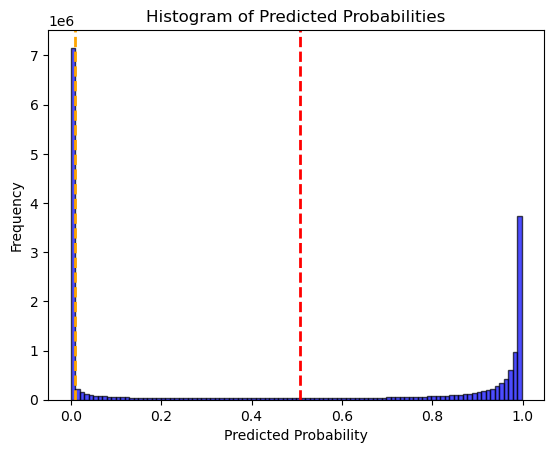

In [31]:
# Standardize the features
#scaler = StandardScaler()
#LMC = scaler.fit_transform(LMC)

# We predict probabilities
y_prob = model.predict_proba(LMC)

# We plot the results
plt.hist(y_prob[:,1], bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', linewidth=2, label='Threshold = 0.7')
plt.axvline(x=0.01, color='orange', linestyle='--', linewidth=2, label='Threshold = 0.7')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

The probability of belonging to class 1 (LMC) for the base sample is represented in the histogram above. Both vertical dashed lines represent two different probability thresholds:
- Orange line (P=0.01): With this threshold we prioritize completion, risking mislabeling some MW stars as LMC.
- Red line (P=0.51): This is the most optimal threshold from the classification point of view (elbow of the ROC curve).

Now we will classify the stars according this two thresholds and analize the data.

In [33]:
# We compute the class for both thresholds
y_completion = (y_prob[:,1] >= 0.01).astype(int)  # e.g. Class 1 if prob >= 0.7, else Class 0
y_optimal = (y_prob[:,1] >= custom_threshold).astype(int)   # e.g. Class 1 if prob >= 0.7, else Class 0

# We add a new column with the type for both thresholds
LMC_completion = LMC
LMC_optimal = LMC

# Convert the predicted values to a pandas Series
LMC_completion['type'] = y_completion  # Assuming y_prob contains 0s and 1s
LMC_optimal['type'] = y_optimal  # Assuming y_prob contains 0s and 1s

# Display the updated DataFrame to confirm
print(LMC_completion.head())
print(LMC_optimal.head())

          ra        dec      pmra  pmra_error     pmdec  pmdec_error  \
0  86.519889 -70.949043  4.168860    0.597505  0.124414     0.677444   
1  86.523821 -70.951382  1.530777    0.254455  1.360081     0.313318   
2  86.500545 -70.945152  2.156806    0.555471 -0.454924     0.562250   
3  86.500588 -70.946037  2.584158    0.751187 -0.223030     0.764437   
4  86.492523 -70.941573  1.760356    0.661429  1.795320     0.668033   

   phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  parallax  \
0        19.859428         19.733662         19.174276  2.022199   
1        19.248655         19.183638         19.205173 -0.019537   
2        20.269714         20.320704         20.181204  0.030107   
3        20.176569         19.920860         19.586826 -2.517903   
4        20.301102         20.706928         19.971590 -0.672847   

   parallax_error  type  
0        0.556190     0  
1        0.230877     1  
2        0.493320     1  
3        0.596177     1  
4        0.571643     1  
  

In [34]:
# Sets of data for each threshold and LMC or MW
LMC_completion_LMC = LMC_completion[LMC_completion['type'] == 1]
LMC_completion_MW = LMC_completion[LMC_completion['type'] == 0]
LMC_optimal_LMC = LMC_optimal[LMC_optimal['type'] == 1]
LMC_optimal_MW = LMC_optimal[LMC_optimal['type'] == 0]

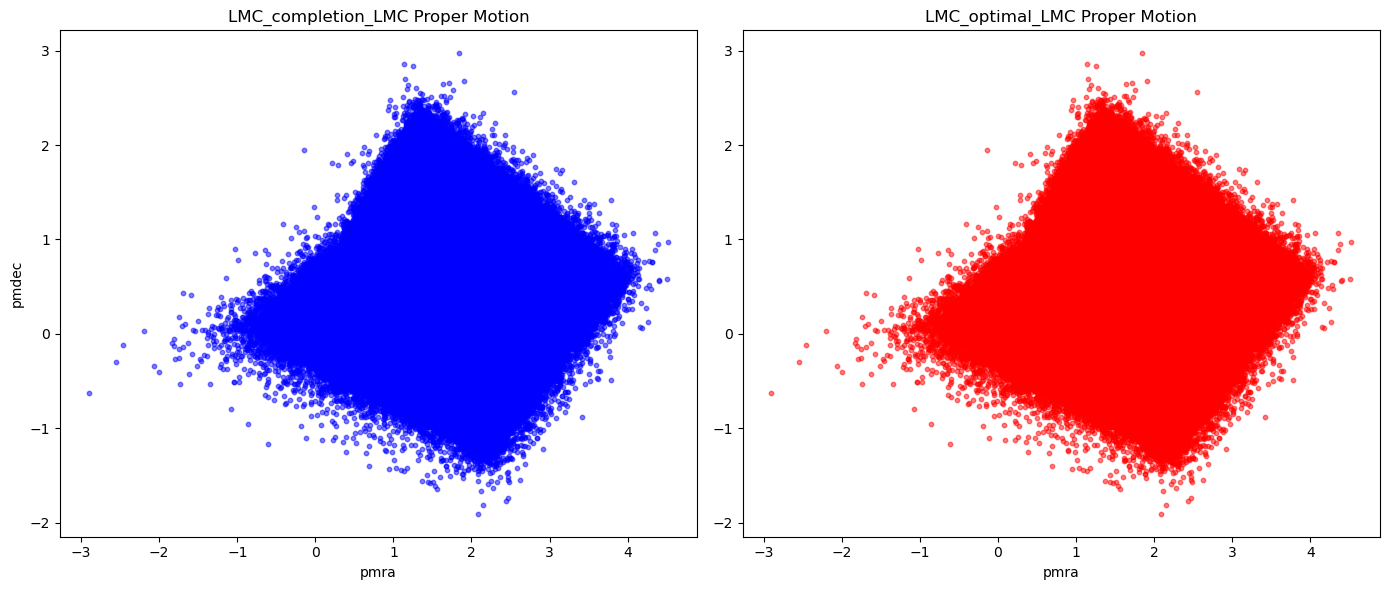

In [119]:
# Plots of the distribution of proper motion of the LMC

# Create a figure with two subplots side by side (independent axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # No 'sharey=True'

# Plot LMC_type_1 on the first subplot
axes[0].scatter(LMC_completion_LMC['pmra'], LMC_completion_LMC['pmdec'], color='blue', alpha=0.5, s=10)
axes[0].set_title('LMC_completion_LMC Proper Motion')
axes[0].set_xlabel('pmra')
axes[0].set_ylabel('pmdec')
#axes[0].grid(True)

# Plot LMC_type_2 on the second subplot
axes[1].scatter(LMC_optimal_LMC['pmra'], LMC_optimal_LMC['pmdec'], color='red', alpha=0.5, s=10)
axes[1].set_title('LMC_optimal_LMC Proper Motion')
axes[1].set_xlabel('pmra')
#axes[1].grid(True)

# Adjust spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

Distributions of the proper motion both for the completion threshold (left) and optimal threshold (right) of stars from the LMC. We see that they form a different cluster from the distributions of the proper motion from the stars of the MW (see below).

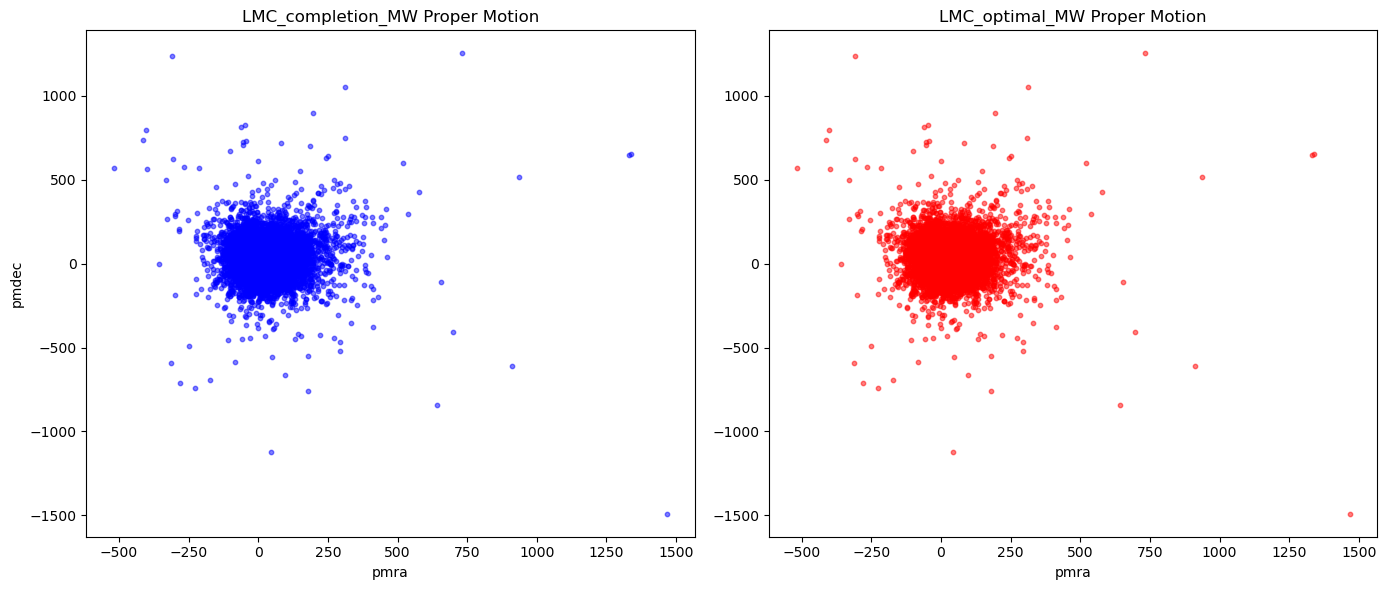

In [47]:
# Plots of the distribution of proper motion of the MW

# Create a figure with two subplots side by side (independent axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # No 'sharey=True'

# Plot LMC_type_1 on the first subplot
axes[0].scatter(LMC_completion_MW['pmra'], LMC_completion_MW['pmdec'], color='blue', alpha=0.5, s=10)
axes[0].set_title('LMC_completion_MW Proper Motion')
axes[0].set_xlabel('pmra')
axes[0].set_ylabel('pmdec')
#axes[0].grid(True)

# Plot LMC_type_2 on the second subplot
axes[1].scatter(LMC_optimal_MW['pmra'], LMC_optimal_MW['pmdec'], color='red', alpha=0.5, s=10)
axes[1].set_title('LMC_optimal_MW Proper Motion')
axes[1].set_xlabel('pmra')
#axes[1].grid(True)

# Adjust spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

Distributions of the proper motion both for the completion threshold (left) and optimal threshold (right) of stars from the MW. We see that they form a different cluster from the distributions of the proper motion from the stars of the LMC (see above).

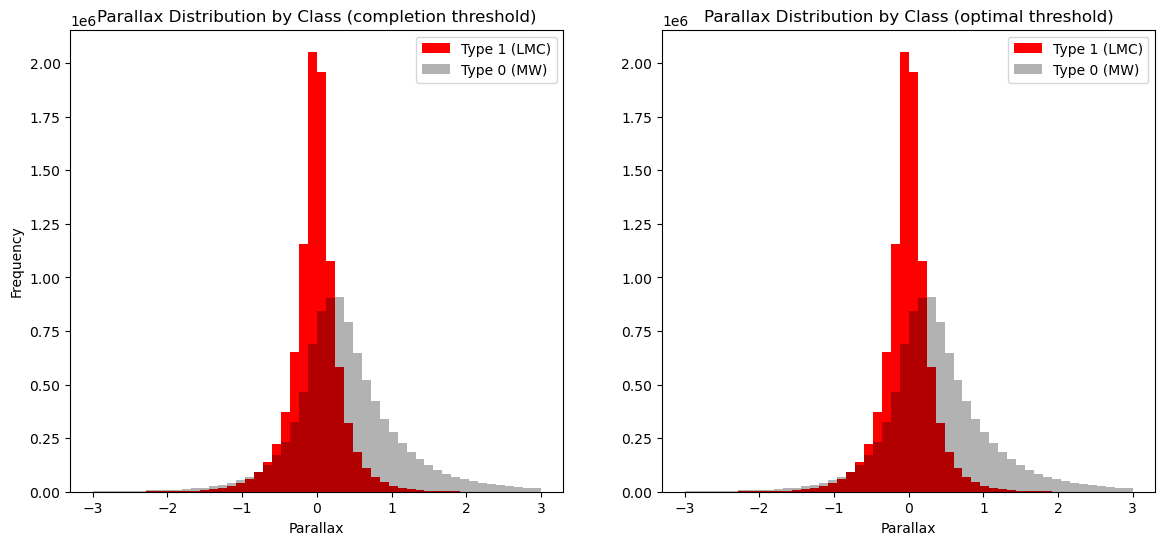

In [112]:
# Distribution of paralaxes completion
# Create a figure with two subplots side by side (independent axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # No 'sharey=True'

# Plot LMC_type_1 on the first subplot
axes[0].hist(LMC_completion_LMC['parallax'], bins=50,range=(-3,3), color='red', label='Type 1 (LMC)')
axes[0].hist(LMC_completion_MW['parallax'], bins=50,range=(-3,3), color='black', alpha=0.3, label='Type 0 (MW)')
axes[0].set_xlabel("Parallax")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Parallax Distribution by Class (completion threshold)")
axes[0].legend()

# Plot LMC_type_2 on the second subplot
axes[1].hist(LMC_optimal_LMC['parallax'], bins=50,range=(-3,3), color='red', label='Type 1 (LMC)')
axes[1].hist(LMC_optimal_MW['parallax'], bins=50,range=(-3,3), color='black', alpha=0.3, label='Type 0 (MW)')
axes[1].set_xlabel("Parallax")
axes[1].set_title("Parallax Distribution by Class (optimal threshold)")
axes[1].legend()

plt.show()


Histograms with the color index distributions both for the completion threshold (left) and optimal threshold (right). We see that the mean parallax of the stars belonging the LMC is smaller than the mean parallax of the stars belonging to the MW, as we expect.

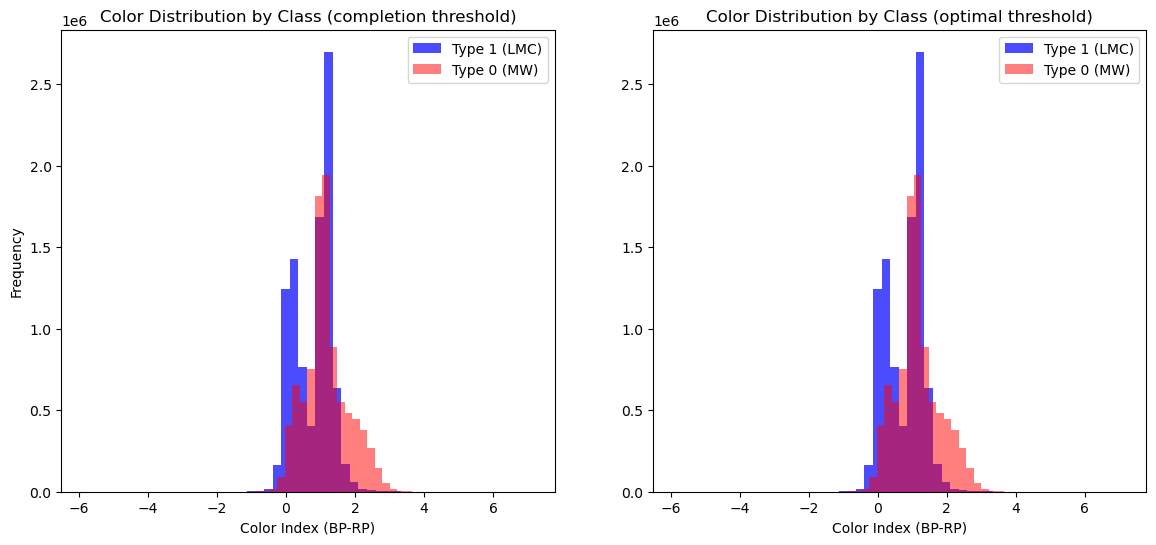

In [94]:
# color

color_index_LMC_completion_LMC = LMC_completion_LMC['phot_bp_mean_mag'] - LMC_completion_LMC['phot_rp_mean_mag']
color_index_LMC_completion_MW = LMC_completion_MW['phot_bp_mean_mag'] - LMC_completion_MW['phot_rp_mean_mag']
color_index_LMC_optimal_LMC = LMC_optimal_LMC['phot_bp_mean_mag'] - LMC_optimal_LMC['phot_rp_mean_mag']
color_index_LMC_optimal_MW = LMC_optimal_MW['phot_bp_mean_mag'] - LMC_optimal_MW['phot_rp_mean_mag']



# Create a figure with two subplots side by side (independent axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # No 'sharey=True'

# Plot LMC_type_1 on the first subplot
axes[0].hist(color_index_LMC_completion_LMC, bins=50, color='blue', alpha=0.7, label='Type 1 (LMC)')
axes[0].hist(color_index_LMC_completion_MW, bins=50, color='red', alpha=0.5, label='Type 0 (MW)')
axes[0].set_xlabel("Color Index (BP-RP)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Color Distribution by Class (completion threshold)")
axes[0].legend()

# Plot LMC_type_2 on the second subplot
axes[1].hist(color_index_LMC_optimal_LMC, bins=50, color='blue', alpha=0.7, label='Type 1 (LMC)')
axes[1].hist(color_index_LMC_optimal_MW, bins=50, color='red', alpha=0.5, label='Type 0 (MW)')
axes[1].set_xlabel("Color Index (BP-RP)")
axes[1].set_title("Color Distribution by Class (optimal threshold)")
axes[1].legend()

plt.show()


Histograms with the color index distributions both for the completion threshold (left) and optimal threshold (right).

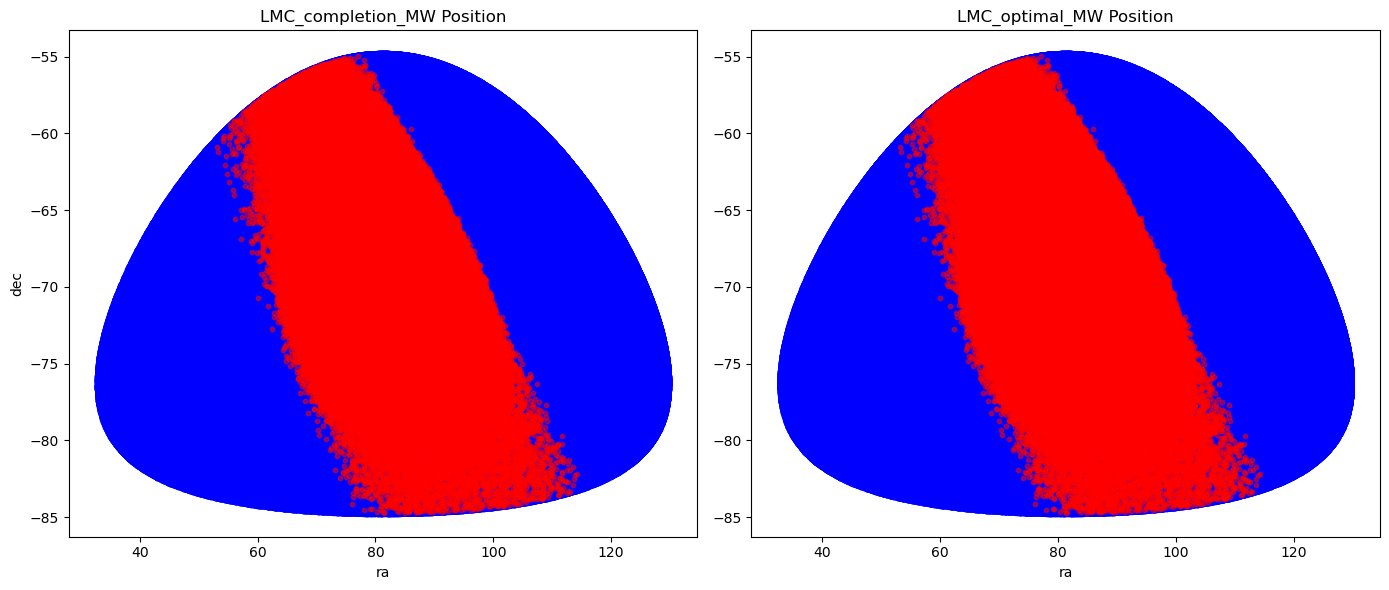

In [104]:
# Distribution 

# Create a figure with two subplots side by side (independent axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # No 'sharey=True'

# Plot LMC_type_1 on the first subplot
axes[0].scatter(LMC_completion_MW['ra'], LMC_completion_MW['dec'], color='blue', alpha=0.5, s=10)
axes[0].scatter(LMC_completion_LMC['ra'], LMC_completion_LMC['dec'], color='red', alpha=0.5, s=10)
axes[0].set_title('LMC_completion_MW Position')
axes[0].set_xlabel('ra')
axes[0].set_ylabel('dec')
#axes[0].grid(True)

# Plot LMC_type_2 on the second subplot
axes[1].scatter(LMC_optimal_MW['ra'], LMC_optimal_MW['dec'], color='blue', alpha=0.5, s=10)
axes[1].scatter(LMC_optimal_LMC['ra'], LMC_optimal_LMC['dec'], color='red', alpha=0.5, s=10)
axes[1].set_title('LMC_optimal_MW Position')
axes[1].set_xlabel('ra')
#axes[1].grid(True)

# Adjust spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

Plots for the position of the LMC and MW stars for the optimal threshold (right) and completion threshold (left). We see that the NN does a good job in the classification of stars, and we don't observe the squared shape of the simulated data used for the training of the NN.

Overall, we can see that this trained NN does a good job differentiating stars from the LMC from stars belonging to the MW.